In [1]:
import nltk
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from textblob import TextBlob as tb 
from datetime import datetime

In [2]:
data = pd.read_csv("facebook_data.csv", sep = ";")

In [3]:
data = data.dropna(axis = 0)


In [4]:
data.created_time
f = lambda x: datetime.strptime(x.split("T")[0], "%Y-%m-%d")
data["created_datetime"] = data.created_time.map(f)


In [5]:
posts = pd.DataFrame(data[["created_datetime","message"]][data.level == 1].values, columns =["date","Text"])
comments = pd.DataFrame(data[["created_datetime","message"]][data.level == 2].values, columns = ["date","Text"])

In [6]:
 posts.Text.values.tolist()[:5]

['We are bringing to you another session of #AskEmiratesNBD . This session will be with the Experts from our Mobile Banking team. We will be going live tomorrow, Monday July 9th at 1 pm on our Facebook, Instagram, and Twitter channels. Be sure to tune in and ask us all your questions.  ÿ≥ŸÜŸÇÿØŸëŸÖ ÿ•ŸÑŸäŸÉŸÖ ŸÅŸÇÿ±ÿ© ÿ¨ÿØŸäÿØÿ© ŸÖŸÜ #AskEmiratesNBD ÿ≠Ÿäÿ´ ÿ≥ÿ™ŸÉŸàŸÜ Ÿáÿ∞Ÿá ÿßŸÑŸÅŸÇÿ±ÿ© ŸÖÿπ ŸÅÿ±ŸäŸÇ ÿÆÿØŸÖÿßÿ™ŸÜÿß ÿßŸÑŸÖÿµÿ±ŸÅŸäÿ© ÿπÿ®ÿ± ÿßŸÑŸáÿßÿ™ŸÅ. ÿ≥ŸÜŸÉŸàŸÜ ÿπŸÑŸâ ÿßŸÑŸáŸàÿßÿ° ŸÖÿ®ÿßÿ¥ÿ±ÿ© ŸäŸàŸÖ ÿßŸÑÿ•ÿ´ŸÜŸäŸÜ9 ŸäŸàŸÑŸäŸà ŸÅŸä ÿ™ŸÖÿßŸÖ ÿßŸÑÿ≥ÿßÿπÿ© 1 ÿ∏Ÿáÿ±ÿßŸã ÿπŸÑŸâ ÿßŸÑŸÅŸäÿ≥ÿ®ŸàŸÉ ŸàÿßŸÑÿ•ŸÜÿ≥ÿ™ÿ∫ÿ±ÿßŸÖ ŸàÿßŸÑÿ™ŸàŸäÿ™ÿ±. ÿ™ÿ£ŸÉÿØŸàÿß ŸÖŸÜ ÿ•ÿ±ÿ≥ÿßŸÑ ÿ£ÿ≥ÿ¶ŸÑÿ™ŸÉŸÖ ÿ•ŸÑŸäŸÜÿß',
 'Do you know how far your food travels from farm to plate? Reduce your food miles and shop local #GoGreen - ŸáŸÑ ÿ™ÿπÿ±ŸÅ ÿ•ŸÑŸâ ÿ£Ÿä ŸÖÿØŸâ ŸäŸÜÿ™ŸÇŸÑ ÿ∑ÿπÿßŸÖŸÉ ŸÖŸÜ ÿßŸÑŸÖÿ≤ÿ±ÿπÿ© ÿ•ŸÑŸâ ÿßŸÑÿ∑ÿ®ŸÇÿü ŸÇŸÑŸÑ ÿßŸÑÿ£ŸÖŸäÿßŸÑ ÿßŸÑÿ∫ÿ∞ÿßÿ¶Ÿäÿ© ÿßŸÑÿÆÿßÿµÿ© ÿ®ŸÉ Ÿàÿ™ÿ≥ŸàŸÇ ŸÖÿ≠ŸÑŸäÿß  #GoGreen',
 'Grab y

In [7]:
comments.Text.values[:10]

array(['Buenas ,y como los contactos gracias',
       'Personal Loan Bundle / Credit Card 2-3 Days Approval  We Accept:  ‚úÖListed or Non-Listed Companies ‚úÖSalary through Bank and Wps (Exchange House) ‚úÖEasy Documentations ‚úÖSalary of 5,000 or 4,000 plus accomodation, transportation, uniform, health insurance card and other allowances ‚úÖPassport, Visa and Emirates id (Copy) ‚úÖSalary Certificate ‚úÖ6months payslips ‚úÖ6months bank statement  For more info: Call/Whatsapp Kristeta - 0556645056',
       'For the last 2 weeks i have been trying to contact someOne regarding home loan and they say we will call u in 48 hours and no one call this is totally unacceptable when we are late for hour loans u will come and vist us at home don‚Äôt promise u want to call if ur are not .. worse bank ever hopefully soon will close my account',
       'Personal Loan Bundle / Credit Card 2-3 Days Approval  We Accept:  ‚úÖListed or Non-Listed Companies ‚úÖSalary through Bank and Wps (Exchange House) ‚

In [8]:
alphabet = list("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ")
alphabet.append(" ")

def isenglish(word):
    r = [letter for letter in list(word) if letter in alphabet]
    #return r
    if len(r)< len(word): return False
    else: return True

isenglish("HELLO world")

True

In [9]:
def join(words):
    sent = ""
    for word in words:
        sent = sent + " " + word
    return sent

def clean(text):
    words = [word for word in nltk.word_tokenize(text) if word.isalpha()]
    english_words = [x for x in words if isenglish(x)]
    return join(english_words)

In [10]:
posts["Clean Text"] = posts["Text"].map(clean)
comments["Clean Text"] = comments["Text"].map(clean)

In [11]:
polarity = lambda x : tb(x).sentiment.polarity
subjectivity = lambda x : tb(x).sentiment.subjectivity

In [12]:
posts["polarity"] = posts["Clean Text"].map(polarity)
posts["subjectivity"] = posts["Clean Text"].map(polarity)
comments["polarity"] = comments["Clean Text"].map(polarity)
comments["subjectivity"] = comments["Clean Text"].map(subjectivity)
comments["sentiment_index"] = list(zip(comments.subjectivity.values, comments.polarity.values))

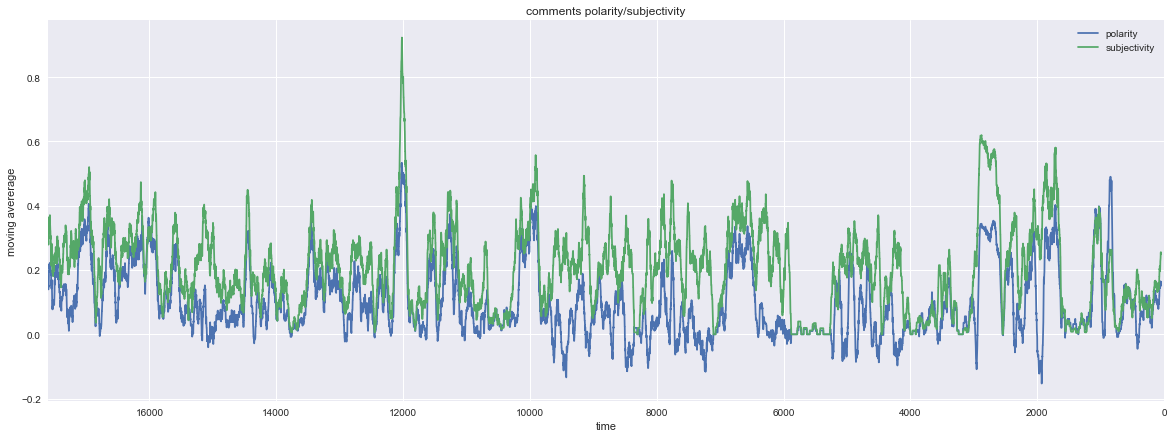

In [13]:
x = comments[["polarity", "subjectivity"]]
X = pd.DataFrame.rolling(x,window = 50).mean()[::-1]
X.plot(figsize = (20,7))
plt.title("comments polarity/subjectivity")
plt.xlabel("time")
plt.ylabel("moving avererage")
plt.show()

In [14]:
def sentiment(index):
    subjectivity, polarity = index[0], index[1]
    if subjectivity > 0.2:
        if polarity > 0: return "Positive"
        else: return "Negetive"
    else: return "Neutral"

comments["sentiment"] = comments["sentiment_index"].map(sentiment)

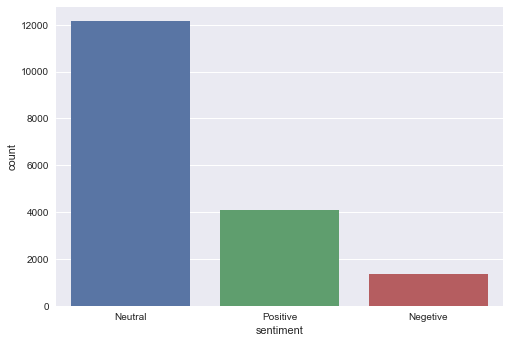

In [15]:
sns.countplot(comments['sentiment'],label="Count")
plt.show()

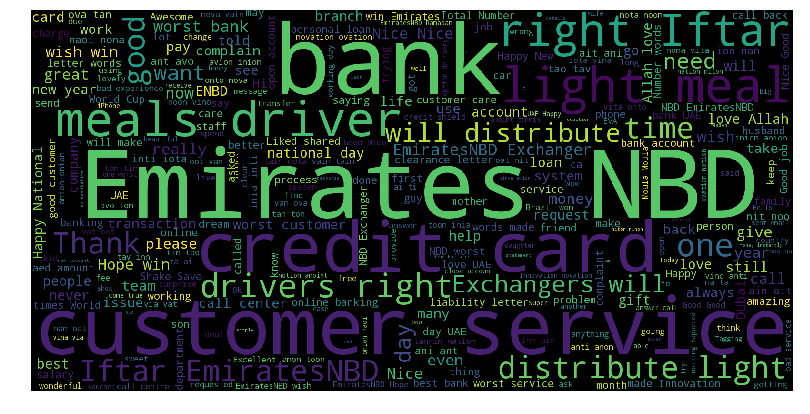

In [16]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

high_polarity_words = " ".join(comments["Clean Text"][comments["sentiment"] != "Neutral"].values.tolist())

wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords = stopwords,  
                          max_words=300,
                          max_font_size=200, 
                          random_state=42
                         ).generate(high_polarity_words)
#print(wordcloud)
fig = plt.figure(figsize = (15,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()